In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquakes-45-turkey-and-its-surroundings/earthquake.csv
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_1.shx
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_2.shx
/kaggle/input/turkeyshp/gadm36_TUR_shp/license.txt
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_0.shp
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_1.dbf
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_0.dbf
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_2.shp
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_0.shx
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_1.shp
/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_2.dbf
/kaggle/input/ne-110m-admin-0-countries/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shx
/kaggle/input/ne-110m-admin-0-countries/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp
/kaggle/input/ne-110m-admin-0-countries/ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf
/kaggle/input/ne-110m-admin-0-countries/ne_110m_admin_0_countries/ne_110m_admin_0_cou

In [2]:
import pandas as pd
import numpy as np
import random as rnd
import geopandas as gpd
%matplotlib inline


import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
earthquake = pd.read_csv('/kaggle/input/earthquakes-45-turkey-and-its-surroundings/earthquake.csv')

In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1624 non-null   object 
 1   latitude         1624 non-null   float64
 2   longitude        1624 non-null   float64
 3   depth            1624 non-null   float64
 4   mag              1624 non-null   float64
 5   magType          1624 non-null   object 
 6   nst              551 non-null    float64
 7   gap              705 non-null    float64
 8   dmin             408 non-null    float64
 9   rms              1036 non-null   float64
 10  net              1624 non-null   object 
 11  id               1624 non-null   object 
 12  updated          1624 non-null   object 
 13  place            1609 non-null   object 
 14  type             1624 non-null   object 
 15  horizontalError  417 non-null    float64
 16  depthError       840 non-null    float64
 17  magError      

In [5]:
earthquake.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-16T11:47:15.128Z,38.4857,45.0727,10.000,5.2,mww,88.0,33.0,1.128,0.99,...,2023-03-17T02:02:47.044Z,Northwestern Iran,earthquake,5.32,1.846,0.063,24.0,reviewed,us,us
1,2023-03-16T10:55:07.953Z,40.7392,31.5128,10.000,4.8,mww,72.0,34.0,0.359,1.16,...,2023-03-17T08:59:30.040Z,"7 km W of Bolu, Turkey",earthquake,1.73,1.834,0.098,10.0,reviewed,us,us
2,2023-03-14T14:49:49.755Z,37.8097,37.3889,10.000,4.6,mwr,87.0,55.0,0.652,1.05,...,2023-03-14T18:26:32.229Z,"11 km NE of Ça?layancerit, Turkey",earthquake,4.41,1.844,0.069,20.0,reviewed,us,us
3,2023-03-14T06:47:35.616Z,38.0742,36.9299,10.000,4.6,mb,54.0,57.0,0.522,0.84,...,2023-03-15T18:06:40.040Z,"19 km S of Af?in, Turkey",earthquake,3.94,1.911,0.105,27.0,reviewed,us,us
4,2023-03-13T01:34:29.897Z,38.1305,38.6864,0.000,4.7,mb,80.0,44.0,0.697,0.98,...,2023-03-13T03:44:18.834Z,"12 km NNE of Sincik, Turkey",earthquake,3.70,4.235,0.058,91.0,reviewed,us,us
5,2023-03-10T02:28:14.775Z,38.6616,35.3098,5.000,4.8,mwr,26.0,61.0,0.461,0.79,...,2023-03-16T07:55:34.671Z,NaN,earthquake,1.75,1.925,0.052,36.0,reviewed,us,us
6,2023-03-07T11:47:28.537Z,38.6304,35.2891,10.000,4.7,mwr,94.0,62.0,0.489,0.85,...,2023-03-08T08:23:12.123Z,"14 km W of Hac?lar, Turkey",earthquake,3.59,1.850,0.065,23.0,reviewed,us,us
7,2023-03-05T20:49:46.490Z,36.7867,36.1842,10.000,4.8,mwr,129.0,60.0,0.802,0.88,...,2023-03-12T17:15:44.750Z,"7 km SW of Dörtyol, Turkey",earthquake,4.89,1.816,0.066,22.0,reviewed,us,us
8,2023-03-03T02:53:42.999Z,37.8535,36.6644,6.064,5.0,mww,84.0,39.0,0.395,0.98,...,2023-03-03T18:09:43.526Z,"23 km SE of Göksun, Turkey",earthquake,5.23,3.389,0.059,28.0,reviewed,us,us
9,2023-03-01T07:20:23.368Z,36.2808,36.0549,11.438,4.7,mb,70.0,102.0,1.285,1.09,...,2023-03-06T22:39:02.991Z,"7 km NW of Günyaz?, Turkey",earthquake,5.78,4.557,0.077,51.0,reviewed,us,us


In [6]:
earthquake.columns 

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [7]:
print(len(earthquake))

1624


In [8]:
null_columns=earthquake.columns[earthquake.isnull().any()]
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1073
gap                 919
dmin               1216
rms                 588
net                   0
id                    0
updated               0
place                15
type                  0
horizontalError    1207
depthError          784
magError            992
magNst              581
status                0
locationSource        0
magSource             0
dtype: int64

In [9]:
earthquake.dropna()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-16T11:47:15.128Z,38.4857,45.0727,10.00,5.2,mww,88.0,33.0,1.128,0.99,...,2023-03-17T02:02:47.044Z,Northwestern Iran,earthquake,5.32,1.846,0.063,24.0,reviewed,us,us
1,2023-03-16T10:55:07.953Z,40.7392,31.5128,10.00,4.8,mww,72.0,34.0,0.359,1.16,...,2023-03-17T08:59:30.040Z,"7 km W of Bolu, Turkey",earthquake,1.73,1.834,0.098,10.0,reviewed,us,us
2,2023-03-14T14:49:49.755Z,37.8097,37.3889,10.00,4.6,mwr,87.0,55.0,0.652,1.05,...,2023-03-14T18:26:32.229Z,"11 km NE of Ça?layancerit, Turkey",earthquake,4.41,1.844,0.069,20.0,reviewed,us,us
3,2023-03-14T06:47:35.616Z,38.0742,36.9299,10.00,4.6,mb,54.0,57.0,0.522,0.84,...,2023-03-15T18:06:40.040Z,"19 km S of Af?in, Turkey",earthquake,3.94,1.911,0.105,27.0,reviewed,us,us
4,2023-03-13T01:34:29.897Z,38.1305,38.6864,0.00,4.7,mb,80.0,44.0,0.697,0.98,...,2023-03-13T03:44:18.834Z,"12 km NNE of Sincik, Turkey",earthquake,3.70,4.235,0.058,91.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2022-07-11T03:36:22.891Z,41.1354,43.9928,10.00,4.7,mb,90.0,43.0,1.021,0.59,...,2022-09-24T21:25:58.040Z,"21 km WSW of Metsavan, Armenia",earthquake,4.20,1.836,0.058,90.0,reviewed,us,us
205,2022-06-12T18:35:20.871Z,38.7366,43.5068,10.00,5.2,mww,67.0,56.0,0.550,0.73,...,2022-08-21T00:16:32.040Z,"28 km NNE of Van, Turkey",earthquake,4.70,1.900,0.086,13.0,reviewed,us,us
206,2022-06-10T06:02:28.549Z,38.8382,43.4028,10.00,4.6,mwr,59.0,58.0,0.590,0.79,...,2022-08-13T21:51:50.040Z,"21 km S of Erci?, Turkey",earthquake,5.20,1.900,0.083,14.0,reviewed,us,us
207,2022-06-03T16:05:10.959Z,36.0633,27.5159,17.71,4.9,mb,111.0,74.0,0.512,0.72,...,2022-08-06T22:13:26.040Z,"35 km WSW of Émponas, Greece",earthquake,4.80,3.900,0.038,231.0,reviewed,us,us


In [10]:

earthquake.dropna(subset=['place'], inplace=True)


In [11]:
turkey_eq = earthquake[earthquake['place'].str.contains('Turkey')]
#aşağıdaki çıktı ile uyuşmuyor!!! tekrar bak
# place sütununu ayrı bir dataset olarak grupladım ve türkiyede en çok deprem meydana gelen spesifik yeri yazdırdım.
most_frequent_place = turkey_eq.groupby('place').size().idxmax()

print("The place with the most earthquakes in Turkey: ", most_frequent_place)

The place with the most earthquakes in Turkey:  Central Turkey


In [12]:
earthquake['time'] = pd.to_datetime(earthquake['time'])

# Depremlerin yıl bilgisini aldım böylece daha temiz sonuç elde ettim.
earthquake['year'] = earthquake['time'].dt.year

# Yıllara göre deprem büyüklüklerinin yoğunluğunu hesapladım.
earthquake_grouped = earthquake.groupby(['year'])['mag'].size().reset_index(name='count')

In [13]:
most_occured_year = earthquake['year'].value_counts().idxmax()
print("En çok deprem meydana gelen yıl:", most_occured_year)


En çok deprem meydana gelen yıl: 2023


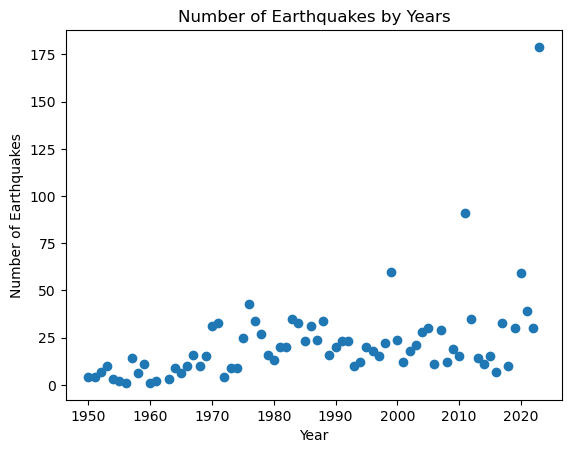

In [14]:

plt.plot(earthquake_grouped['year'], earthquake_grouped['count'], 'o')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')

plt.title('Number of Earthquakes by Years')

plt.show()

In [15]:
max_mag = earthquake['mag'].max()

# Şu ana kadar olan depremlerden en büyüğünün büyüklüğünün kaç olduğunu yazdırdım.
print("The magnitude of the largest earthquake to date:: ", max_mag)

The magnitude of the largest earthquake to date::  7.8


In [16]:
max_mag_place = earthquake.loc[earthquake['mag'].idxmax(), 'place']
#en büyük depremin nerede olduğunu yazdırdım.
print("Earthquake location name: ", max_mag_place)

Earthquake location name:  Pazarcik earthquake, Kahramanmaras earthquake sequence


In [17]:
max_depth = earthquake['depth'].max()
max_depth_index = earthquake['depth'].idxmax()
print("Deepest earthquake depth", max_depth)
print("Place it has deepest earthquake: ", earthquake.loc[max_depth_index, 'place'])

Deepest earthquake depth 168.4
Place it has deepest earthquake:  27 km SW of Kéfalos, Greece


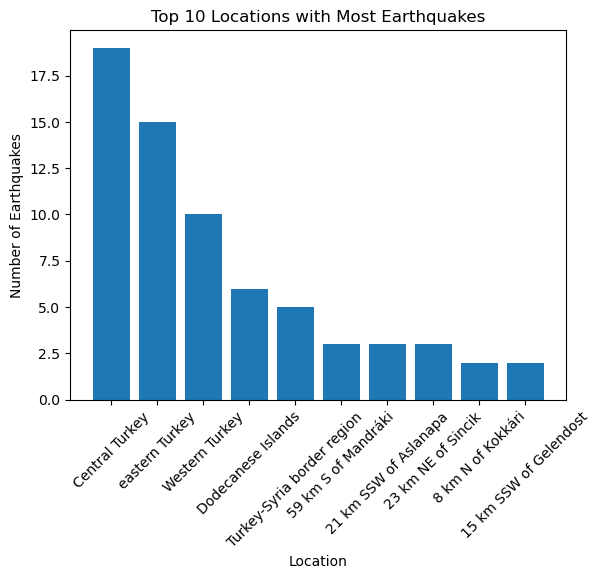

In [18]:
# Verileri temizle
earthquake['place'] = earthquake['place'].str.split(',').str[0]

# En çok deprem olan ilk 10 yeri bul
top10_places = earthquake['place'].value_counts().nlargest(10)

# Sütun grafiği çiz
plt.bar(top10_places.index, top10_places.values)
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Number of Earthquakes')
plt.title('Top 10 Locations with Most Earthquakes')
plt.show()


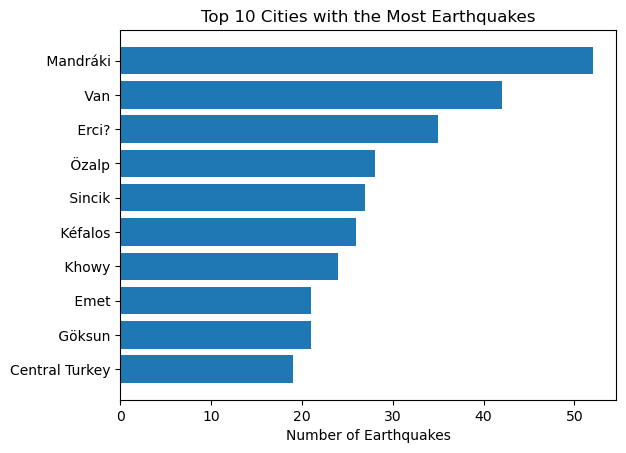

In [19]:
# "place" sütunundaki verileri düzenleyerek şehir isimlerini alalım, split 'of' dedim çünkü of bağlacından sonra şehir isimleri geliyor
city_counts = earthquake['place'].str.split('of').str[-1].value_counts().head(10)

# Grafiği çizdir
plt.barh(city_counts.index, city_counts.values)
plt.xlabel('Number of Earthquakes')
plt.title('Top 10 Cities with the Most Earthquakes')
plt.gca().invert_yaxis()  # grafiği ters çevirerek büyükten küçüğe doğru sıralar
plt.show()


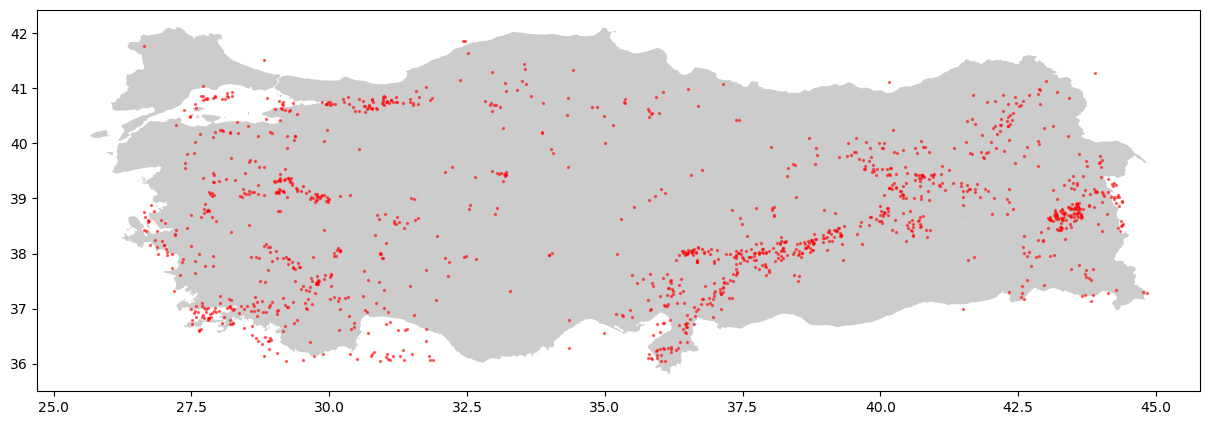

In [20]:

turkey = gpd.read_file('/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_1.shp')

# Deprem verilerini oku ve koordinatları GeoDataFrame'e dönüştür
deprem_gdf = gpd.GeoDataFrame(turkey_eq, geometry=gpd.points_from_xy(turkey_eq['longitude'], turkey_eq['latitude']))

# Boş bir matplotlib figure objesi oluşturdum
fig, ax = plt.subplots(figsize=(15,15))

# Turkey Shapefile'ını plot ettim
turkey.plot(ax=ax, alpha=0.4, color='grey')

# Deprem noktalarını plot ettim
deprem_gdf.plot(ax=ax, markersize=2, color='red', alpha=0.5)

plt.show()
#burada amaç deprem yoğunluğunu Türkiye haritası üzerinde göstermek. 

In [21]:
deprem_noktasi = [Point(xy) for xy in zip(deprem_gdf["longitude"], deprem_gdf["latitude"])]

# geopandas dataframe oluştur
deprem_geo = gpd.GeoDataFrame(deprem_gdf, geometry=deprem_noktasi)

# koordinat referansını tanımla
deprem_geo.crs = {'init': 'epsg:4326'}

# Türkiye haritasını oku
turkey = gpd.read_file('/kaggle/input/turkeyshp/gadm36_TUR_shp/gadm36_TUR_1.shp')

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


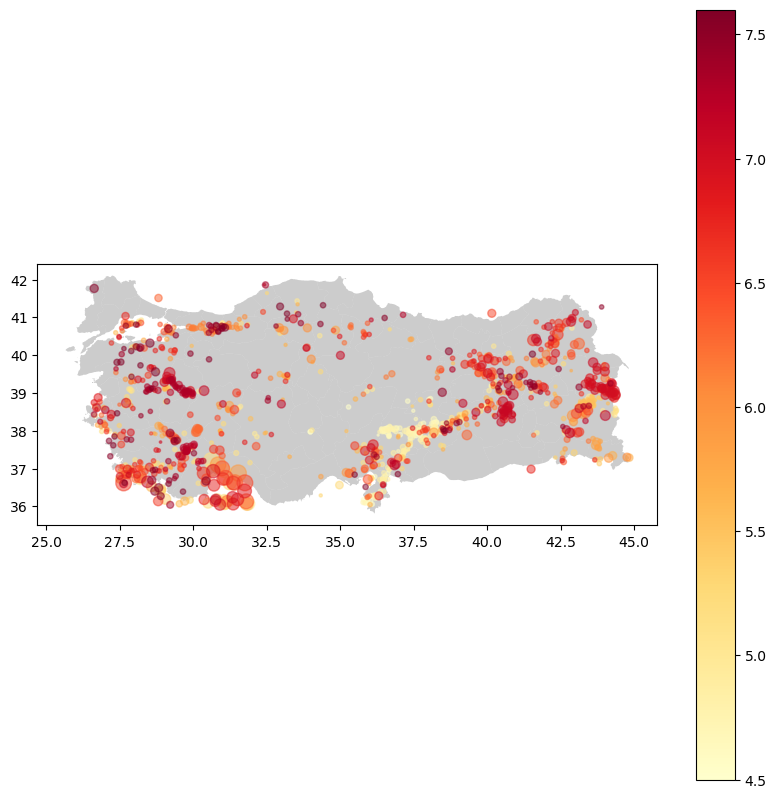

In [22]:

fig, ax = plt.subplots(figsize=(10,10))


turkey.plot(ax=ax, alpha=0.4, color='grey')

# noktaları şiddet değerlerine göre renklendirerek çiz
deprem_geo.plot(ax=ax, markersize=deprem_geo['depth'], 
                c=deprem_geo['mag'], cmap='YlOrRd', alpha=0.5)

# renk skalasını göster
vmin, vmax = deprem_geo['mag'].min(), deprem_geo['mag'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)


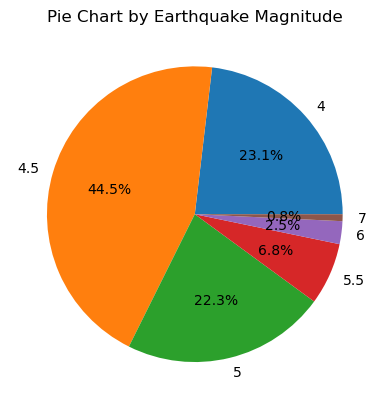

In [23]:

#Türkiyedeki depremlerin büyüklüklerine göre pasta grafiği üzerinde gösterilmiş hali

bins = [4,4.5, 5, 5.5, 6, 7, 8, ]


plt.pie(turkey_eq.groupby(pd.cut(turkey_eq.mag, bins=bins)).count().id, labels=bins[:-1], autopct='%1.1f%%')
plt.title('Pie Chart by Earthquake Magnitude')
plt.rcParams.update({'font.size': 10})
plt.show()
